<a href="https://colab.research.google.com/github/Jingut/EX/blob/main/Exp_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# colab용 라이브러리 설치
!pip install google-api-python-client google-cloud-vision
!pip install keras_ocr matplotlib==3.3.0
!apt install tesseract-ocr
!apt install libtesseract-dev
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libtesseract-dev is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

from google.cloud import vision
import io

import keras_ocr
import cv2

import os
import pytesseract
from PIL import Image
from pytesseract import Output

import glob

In [3]:
def get_img_path_n_file_list(work_dir= '/content/drive/MyDrive/aiffel/ocr_python/images', img_ext='.jpg'): # 데이터 로드
  img_path_list = [img_path for img_path in glob.glob(work_dir + '/*') if img_path.endswith(img_ext)]
  img_file_list = [img_file for img_file in os.listdir(work_dir) if img_file.endswith(img_ext)]
  return img_path_list, img_file_list

In [4]:
work_dir = '/content/drive/MyDrive/aiffel/ocr_python/images'
img_ext = '.jpg'
img_path_list, img_file_list = get_img_path_n_file_list(work_dir, img_ext)

In [5]:
img_path_list.sort()
img_path_list

['/content/drive/MyDrive/aiffel/ocr_python/images/ganpan1.jpg',
 '/content/drive/MyDrive/aiffel/ocr_python/images/ganpan2.jpg',
 '/content/drive/MyDrive/aiffel/ocr_python/images/ganpan3.jpg',
 '/content/drive/MyDrive/aiffel/ocr_python/images/ganpan4.jpg',
 '/content/drive/MyDrive/aiffel/ocr_python/images/ganpan5.jpg']

##데이터 확인

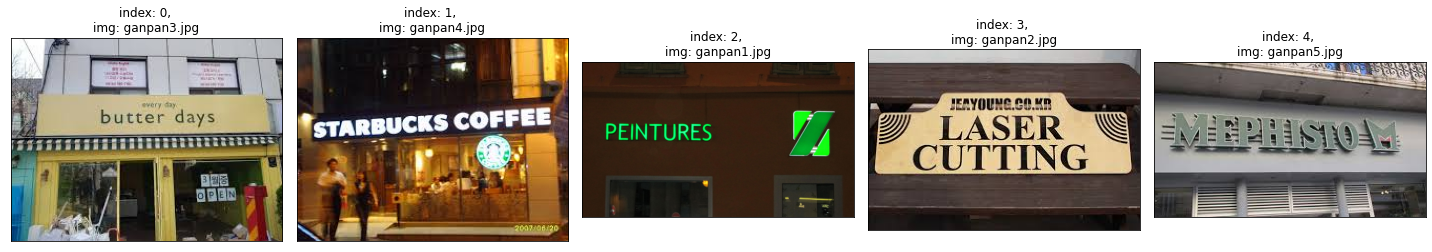

In [6]:
plt.figure(figsize=(20, 20))

for i, (img_path, img_file) in enumerate(zip(img_path_list, img_file_list)):
    plt.subplot(5, 5, i+1)
    plt.title(f'index: {i}, \nimg: {img_file}')

    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)

    plt.tight_layout()

plt.show()

#Step2. keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)

##keras ocr


In [7]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [8]:
images = [keras_ocr.tools.read(img_path) for img_path in img_path_list]
prediction_groups = [pipeline.recognize([img_path]) for img_path in img_path_list]

In [9]:
def draw_keras_ocr(images, prediction_groups):
  # Plot the predictions
  fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
  fig.tight_layout()
  for idx, ax in enumerate(axs):
      keras_ocr.tools.drawAnnotations(image=images[idx], 
                                      predictions=prediction_groups[idx][0], ax=ax)

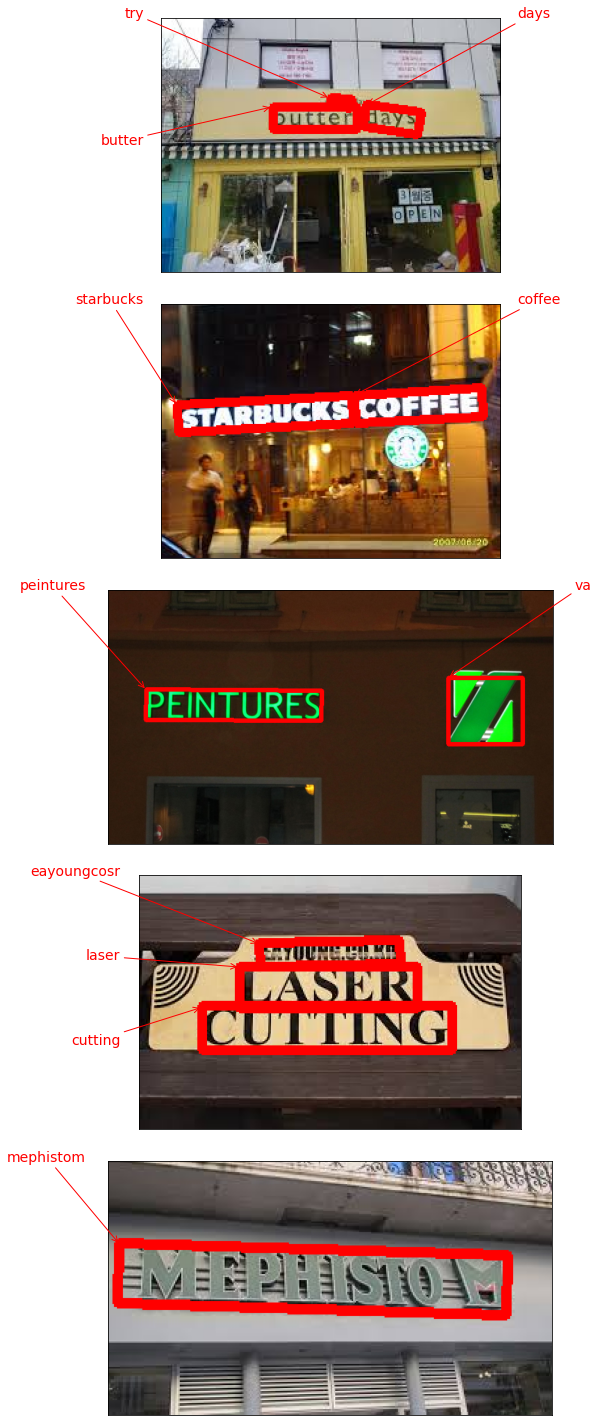

In [10]:
draw_keras_ocr(images, prediction_groups)

In [11]:
keras_ocr_dict = {}
for idx, img_path in enumerate(img_path_list):
  keras_ocr_dict[img_path] = prediction_groups[idx][0]

In [12]:
keras_ocr_dict

{'/content/drive/MyDrive/aiffel/ocr_python/images/ganpan1.jpg': [('try',
   array([[129.15575 ,  61.286896],
          [145.47542 ,  62.7705  ],
          [144.86885 ,  69.44263 ],
          [128.54918 ,  67.95902 ]], dtype=float32)),
  ('butter', array([[ 85.,  68.],
          [149.,  68.],
          [149.,  85.],
          [ 85.,  85.]], dtype=float32)),
  ('days', array([[156.72813 ,  66.721115],
          [198.31624 ,  72.45741 ],
          [195.96852 ,  89.478424],
          [154.38042 ,  83.74213 ]], dtype=float32))],
 '/content/drive/MyDrive/aiffel/ocr_python/images/ganpan2.jpg': [('coffee',
   array([[147.23076,  70.15385],
          [244.70769,  64.73846],
          [245.90462,  86.28307],
          [148.42769,  91.69846]], dtype=float32)),
  ('starbucks', array([[ 12.239534 ,  77.29796  ],
          [145.76164  ,  70.39163  ],
          [146.8663   ,  91.74829  ],
          [ 13.3441925,  98.65462  ]], dtype=float32))],
 '/content/drive/MyDrive/aiffel/ocr_python/images/ganpan

In [13]:
keras_ocr_text_pos_list = []
keras_ocr_text_list = []
for idx, img_path in enumerate(img_path_list):
  keras_ocr_text_pos_list.append([idx, list(zip(*keras_ocr_dict[img_path]))[1]])
  keras_ocr_text_list.append([idx, list(zip(*keras_ocr_dict[img_path]))[0]])

In [14]:
keras_ocr_text_pos_list

[[0, (array([[129.15575 ,  61.286896],
          [145.47542 ,  62.7705  ],
          [144.86885 ,  69.44263 ],
          [128.54918 ,  67.95902 ]], dtype=float32), array([[ 85.,  68.],
          [149.,  68.],
          [149.,  85.],
          [ 85.,  85.]], dtype=float32), array([[156.72813 ,  66.721115],
          [198.31624 ,  72.45741 ],
          [195.96852 ,  89.478424],
          [154.38042 ,  83.74213 ]], dtype=float32))],
 [1, (array([[147.23076,  70.15385],
          [244.70769,  64.73846],
          [245.90462,  86.28307],
          [148.42769,  91.69846]], dtype=float32),
   array([[ 12.239534 ,  77.29796  ],
          [145.76164  ,  70.39163  ],
          [146.8663   ,  91.74829  ],
          [ 13.3441925,  98.65462  ]], dtype=float32))],
 [2, (array([[535., 139.],
          [652., 139.],
          [652., 243.],
          [535., 243.]], dtype=float32), array([[ 60.0793  , 157.8883  ],
          [336.13263 , 159.03375 ],
          [335.93652 , 206.29437 ],
          [ 59.883

In [15]:
keras_ocr_text_list

[[0, ('try', 'butter', 'days')],
 [1, ('coffee', 'starbucks')],
 [2, ('va', 'peintures')],
 [3, ('eayoungcosr', 'laser', 'cutting')],
 [4, ('mephistom',)]]

##Tesseract

In [16]:
def crop_word_regions(image_path='./images/sample.png', output_path='./output', lang='eng'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang=lang,    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_dict = {}
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            img_file = img_path.split('/')[-1][:-4]
            output_img_path = os.path.join(output_path, f"{img_file + '_' + str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_dict[output_img_path] = [(left, top), (left+width, top), (left+width, top+height), (left, top+height)]
            index += 1
    return cropped_image_dict

In [17]:
def recognize_images(cropped_image_path_list, lang='eng'):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    text_list = []
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang=lang,    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        text = recognized_data['text']
        print(text)
        text_list.append(text)
    print("Done")

    return text_list

In [18]:
output_dir = work_dir + '/tesseract_output'

tesseract_ocr_dict = {}
for img_path, img_file in zip(img_path_list, img_file_list):
    print(f'---------------{img_file}---------------')
    cropped_image_dict = crop_word_regions(img_path, output_dir)
    
    # 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
    text_list = recognize_images(cropped_image_dict.keys())
    tesseract_ocr_dict[img_file] = {'text_list': text_list, 'cropped_image_dict': cropped_image_dict}

---------------ganpan3.jpg---------------
/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan1_0000.png
—

Done
---------------ganpan4.jpg---------------
/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan2_0000.png
/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan2_0001.png
/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan2_0002.png
/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan2_0003.png
/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan2_0004.png
/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan2_0005.png
/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan2_0006.png
/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan2_0007.png
/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan2_0008.png
xs

eee 9

* STARBUCKS

ee

oh

a

_

e606 2

Se

Done
---------------ganpan1.

In [19]:
tesseract_ocr_dict

{'ganpan3.jpg': {'text_list': ['—\n\x0c'],
  'cropped_image_dict': {'/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan1_0000.png': [(0,
     0),
    (259, 0),
    (259, 194),
    (0, 194)]}},
 'ganpan4.jpg': {'text_list': ['xs\n\x0c',
   'eee 9\n\x0c',
   '* STARBUCKS\n\x0c',
   'ee\n\x0c',
   'oh\n\x0c',
   'a\n\x0c',
   '_\n\x0c',
   'e606 2\n\x0c',
   'Se\n\x0c'],
  'cropped_image_dict': {'/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan2_0000.png': [(142,
     6),
    (160, 6),
    (160, 20),
    (142, 20)],
   '/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan2_0001.png': [(146,
     24),
    (161, 24),
    (161, 33),
    (146, 33)],
   '/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan2_0002.png': [(0,
     72),
    (144, 72),
    (144, 101),
    (0, 101)],
   '/content/drive/MyDrive/aiffel/ocr_python/images/tesseract_output/ganpan2_0003.png': [(149,
     67),
    (242, 67),
    (242, 94),
  

In [20]:
tesseract_ocr_text_pos_list = []
tesseract_ocr_text_list = []
for i, (img_path, tesseract_ocr_result) in enumerate(tesseract_ocr_dict.items()):
  tesseract_ocr_text_list.append([i, tesseract_ocr_result['text_list']])
  tesseract_ocr_text_pos_list.append([i, list(tesseract_ocr_result['cropped_image_dict'].values())])

In [21]:
tesseract_ocr_text_list

[[0, ['—\n\x0c']],
 [1,
  ['xs\n\x0c',
   'eee 9\n\x0c',
   '* STARBUCKS\n\x0c',
   'ee\n\x0c',
   'oh\n\x0c',
   'a\n\x0c',
   '_\n\x0c',
   'e606 2\n\x0c',
   'Se\n\x0c']],
 [2, ['\x0c']],
 [3, ['\x0c', 'CUTTING\n\x0c']],
 [4, ['sane\n\x0c']]]

In [22]:
tesseract_ocr_text_list

[[0, ['—\n\x0c']],
 [1,
  ['xs\n\x0c',
   'eee 9\n\x0c',
   '* STARBUCKS\n\x0c',
   'ee\n\x0c',
   'oh\n\x0c',
   'a\n\x0c',
   '_\n\x0c',
   'e606 2\n\x0c',
   'Se\n\x0c']],
 [2, ['\x0c']],
 [3, ['\x0c', 'CUTTING\n\x0c']],
 [4, ['sane\n\x0c']]]

#Step3. 테스트 결과 정리

##keras_ocr 검출결과


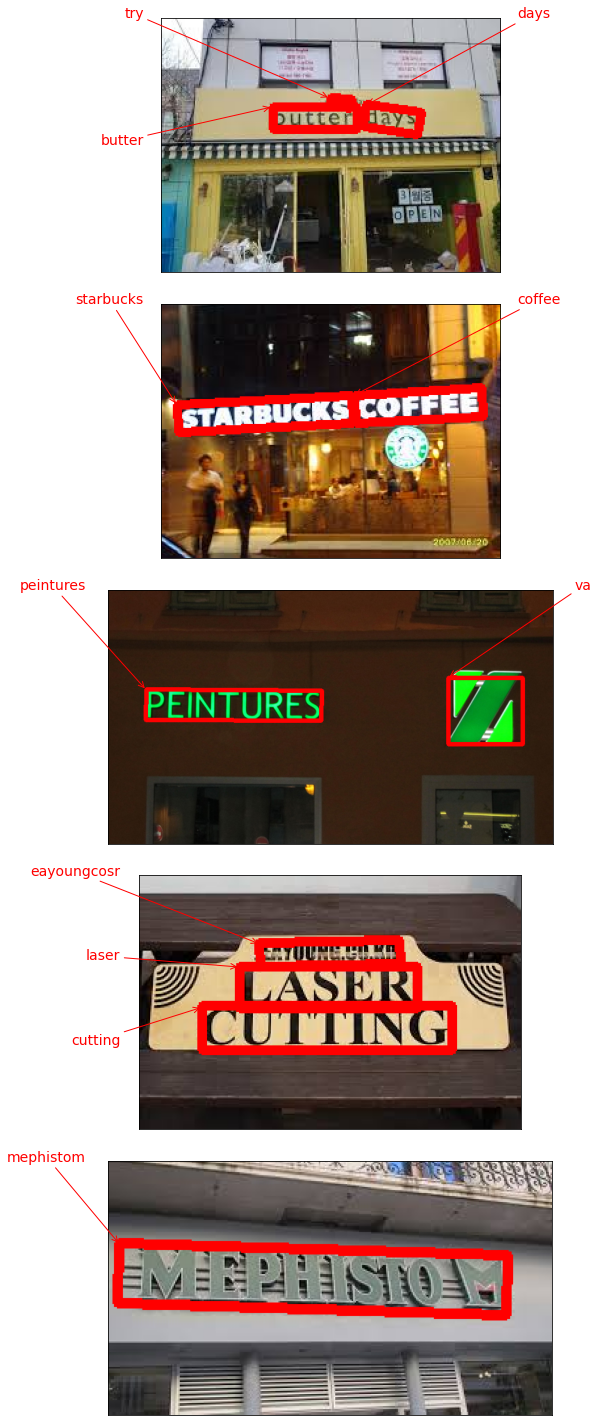

In [23]:
draw_keras_ocr(images, prediction_groups)

##tesseract_ocr 검출결과

In [24]:
tesseract_ocr_text_list

[[0, ['—\n\x0c']],
 [1,
  ['xs\n\x0c',
   'eee 9\n\x0c',
   '* STARBUCKS\n\x0c',
   'ee\n\x0c',
   'oh\n\x0c',
   'a\n\x0c',
   '_\n\x0c',
   'e606 2\n\x0c',
   'Se\n\x0c']],
 [2, ['\x0c']],
 [3, ['\x0c', 'CUTTING\n\x0c']],
 [4, ['sane\n\x0c']]]

#Step4. 결과 분석과 결론 제시

- 평가기준 : 영어로된 간판에 있는 글자를 정확하게 추출했나?

|OCR|ganpan1|ganpan2|ganpan3|ganpan4|ganpan5|총평|
|---|---|---|---|---|---|---|
|Keras_OCR|try, buttter, days|starbucks, coffee|peintures, va|eayoungcosr, laser, cutting|mephistom|전반적으로 해석은 잘되는듯 하나, 약간의 틀린 부분도 있고 로고를 알파벳으로 인식하는 경향도 있다.|
|Tesseract_OCR|—|xs, STARBUCKS, ee, oh, a, _, e606 2, Se|검출x|CUTTING|sane|스타벅스 이외에는 바르게 검출된 결과물이 존재하지 않고, 이상한 단어만 검출되는 모습이 보였다.|

---

결과적으로 보았을 때 케라스 OCR이 검출을 잘해낸 것으로 보인다. 하지만 로고를 알파벳으로 인식하는 등의 문제는 해결이 필요할것 같다.

# 회고

---



## - 이번 프로젝트에서 어려웠던 점
구글 OCR을 해보려하다가 막혀서 진행을 못해보았고 라이브러리가 코랩 떄문인지는 몰라도 불러오기가 제대로 되지 않아서 파일을 새로 만들고나서야 정상진행이 되었습니다..


---


## - 프로젝트를 진행하면서 알게된 점
OCR이 어떤 방식으로 작동하는지 개념정도를 알게되었고 좌표값을 이용하여 바운딩박스를 친다는 것을 알게 되었습니다.

그리고 파일 경로를 지정할 때 마지막에 / 를 넣어줘야 제대로 인식한다는 점을 알았습니다.


---


## - 루브릭 평가지표를 맞추기 위해 시도한 것들
사진을 다양하게 바꿔 보았습니다. 다른 OCR도 찾아보았지만 쉽지 않았습니다..

---


## - 자기다짐
고잉디퍼 때에는 더 열심히 해야겠다고 생각했습니다.

